## Аршакян Алина 

# ДЗ4 Оцениваемое 

## Задание 1

Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом.

Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл. 

In [44]:
import nltk #Я хотела использовать spacy , но , видимо , из недостатка памяти компьютер неправильно установил и выскакивала постоянно ошибка , не находил модуль thinc.neural  
from nltk import WordNetLemmatizer
import re 

wnl = WordNetLemmatizer() 
with open ("Harry_Potter_and_the_Sorcerers_Stone.txt", "r+", encoding="utf-8", errors='ignore') as f:
    harry = f.read() #прочитываем файл 
    potter = re.sub('[\'!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"]', "", harry) #удаляем всю пунктуацию 
    stone = potter.lower() #я не стала проходиться циклом по всему тексту, искать слова с заглавной и приводить их к нижнему регистру, лучше сразу
    sorcerer = [wnl.lemmatize(b) for b in stone] #лемматизируем 
    orden = "".join(sorcerer) #объединяем в переменную
    
with open ("sorceres.txt", "w+", encoding="utf-8", errors='ignore') as h:
    for i in orden: #записываем в отдельный файл 
        h.write(i)        

Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте).

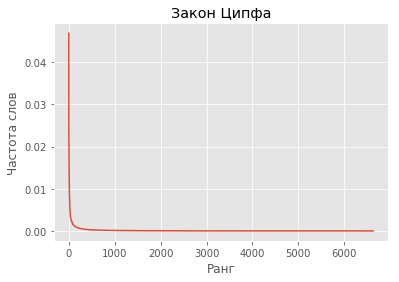

In [75]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style 
from collections import Counter 


#импортирую необходимые библиотеки и модули 
# нам необходимо посчитать два параметра - ранг и частоту употребления

counts_v0 = Counter(orden.split()) #для этого считываем частотность каждого слова
counts = dict(counts_v0) #чтобы потом воспользоваться именно значением - создаем словарь
counts_words = dict(sorted(counts.items(), key=lambda x: x[1], reverse=True)) #сортируем его по убыванию
OX = {} #здесь будут хранится значения по оси Х - ранг 

OX = {key: rank for rank, key in enumerate(sorted(counts_words, key=counts_words.get), 1)} #меняем значение на порядковый номер

#Займемся осью У
#чтобы посчитать частоту, необходимую для доказательства - нам нужно узнать абсолютную - для оси Y

OY = dict() #создаем еще словарь 
quantity = len(orden.split()) #для подсчета нужно знать число слов
for key, value in reversed(sorted(counts_words.items(), key=lambda x: x[1], reverse=False)): #опять в отсортированном словаре , где значение - частота вхождений 
    x = value/quantity #высчитываем по формуле , используя значение 
    OY[key] = x #добавляем в словарь 
    
style.use('ggplot')  #чтоб красиво выглядело - используем "стиль"
plt.plot(list(OX.values()), list(OY.values())) #по оси Х - порядковые номер (хранится в значении OX), 
plt.title("Закон Ципфа") #присуждаем название 
plt.xlabel("Ранг")
plt.ylabel("Частота слов")
plt.show()


Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [56]:
#Очистите текст от стоп-слов.
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize #смотрим из семинара, какие модули на пригодятся

sw = stopwords.words('english') #удаляем стопслова используя генератор списков 
without_stopwords = [w for w in word_tokenize(orden) if w not in sw]

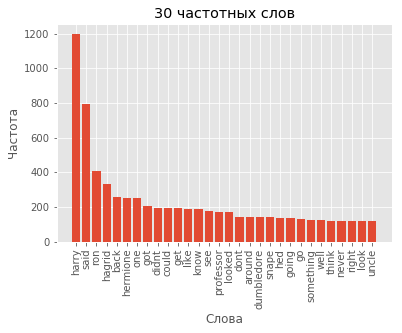

In [64]:
#Постройте barplot для 30 самых частотных слов. 
#Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

#опять используем метод counter чтобы посчитать частотность слов
newlistofwords = Counter(without_stopwords)

#нам необходимо отсортировать наши слова, а для этого создадим словарь , как в пункте 2
slovar = dict(newlistofwords)
counts_words = dict(sorted(slovar.items(), key=lambda x: x[1], reverse=True))

#теперь нужно для каждой оси вытащить и значение, и ключ и записать все в список
OY = list(counts_words.values()) 
OX = list(counts_words.keys()) 

#так как нам нужны первые 30 слов , то делаем выборку 
x = [i for i in range(0,30)]
plt.bar(x, OY[:30]) 
plt.xticks(x, OX, rotation=90) #чтоб слова не слиплись - поворачиваем на 90 градусов
plt.title("30 частотных слов")
plt.xlabel("Слова")
plt.ylabel("Частота")
plt.show()

